In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno
from category_encoders import TargetEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.metrics import accuracy_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix , classification_report, roc_auc_score, roc_curve
import seaborn as sns

In [2]:
# pip install xlrd

## Importing the dataset

In [3]:
df = pd.read_excel('data.xls')

## Data analysis

In [4]:
df.head()

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
0,1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1300,NaN
1,2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,1570,1800.0
2,3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,...,269.0,1004.0,NaN,1000.0,1000.0,1560.0,553.0,1567.0,1450,1450.0
3,4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,...,30.0,16.0,NaN,1000.0,1000.0,1301.0,17.0,1301.0,2000,2000.0
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,74.0,38.0,NaN,13594.0,16000.0,1518.0,19.0,1389.0,1700,1700.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY         5626 non-null   int64  
 1   VAR_TARGET  5626 non-null   int64  
 2   VAR_1       5626 non-null   int64  
 3   VAR_2       5626 non-null   object 
 4   VAR_3       5622 non-null   float64
 5   VAR_4       4344 non-null   float64
 6   VAR_5       4344 non-null   float64
 7   VAR_6       5612 non-null   float64
 8   VAR_7       5612 non-null   float64
 9   VAR_8       5612 non-null   float64
 10  VAR_9       5612 non-null   float64
 11  VAR_10      5612 non-null   float64
 12  VAR_11      5316 non-null   float64
 13  VAR_12      5626 non-null   int64  
 14  VAR_13      4528 non-null   float64
 15  VAR_14      4528 non-null   float64
 16  VAR_15      1801 non-null   float64
 17  VAR_16      5598 non-null   object 
 18  VAR_17      5508 non-null   float64
 19  VAR_18      5612 non-null  

In [6]:
df.describe()

,KEY,VAR_TARGET,VAR_1,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
count,5626.000000,5626.000000,5626.000000,5622.000000,4344.000000,4344.000000,5612.000000,5612.000000,5612.000000,5612.000000,...,5621.000000,5621.000000,34.000000,5612.000000,4528.000000,1814.000000,5621.000000,2306.000000,5.626000e+03,3362.000000
mean,2813.500000,0.043726,3257.151973,33.639808,6513.402164,3401.622238,0.617962,9748.699572,4144.263899,1148.589095,...,2195.338730,2199.308842,3611.764706,4129.482359,2299.436617,2401.598126,2149.124177,1897.083261,6.115745e+03,3508.943783
std,1624.230638,0.204502,888.997086,5.607477,7635.750969,4629.699543,1.368544,16482.921883,8517.336280,2160.342345,...,15104.976409,15096.942980,2696.766561,4737.091335,3525.160200,2180.234920,15469.080255,1818.558706,8.491456e+04,6886.322041
min,1.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1300.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000e+00,500.000000
25%,1407.250000,0.000000,2606.000000,34.000000,2000.000000,800.000000,0.000000,2000.000000,616.500000,160.000000,...,0.000000,0.000000,2084.500000,1201.500000,0.000000,1364.000000,0.000000,893.000000,1.650000e+03,1774.750000
50%,2813.500000,0.000000,3103.000000,34.000000,4050.000000,1800.000000,0.000000,5000.000000,2051.000000,582.000000,...,2.000000,12.000000,2985.000000,2650.000000,1000.000000,1855.500000,18.000000,1541.500000,2.500000e+03,2500.000000
75%,4219.750000,0.000000,3707.000000,34.000000,7900.000000,4200.000000,1.000000,11062.500000,4715.750000,1331.000000,...,238.000000,304.000000,3800.000000,5200.000000,3000.000000,2909.000000,328.000000,2449.000000,3.500000e+03,3600.000000
max,5626.000000,1.000000,7011.000000,81.000000,81500.000000,45000.000000,31.000000,304800.000000,178711.000000,50203.000000,...,529716.000000,543328.000000,15000.000000,43700.000000,50000.000000,55594.000000,561609.000000,29422.000000,4.200000e+06,220000.000000


In [7]:
# pip install pandas-profiling

In [8]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='Credit_Card_Fraud_Report.html')

## Train Test Split

In [9]:
# Separated into arguments (X) and target value (y)
X = df.drop(['VAR_TARGET','KEY'], axis=1)  
y = df['VAR_TARGET']

# The data set is divided into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(4500, 50)
(1126, 50)


In [11]:
y_train.value_counts()

0    4303
1     197
Name: VAR_TARGET, dtype: int64

In [12]:
y_test.value_counts()

0    1077
1      49
Name: VAR_TARGET, dtype: int64

## Preprocessing

### Missing Value Handling

In [13]:
df.isnull().sum()

KEY              0
VAR_TARGET       0
VAR_1            0
VAR_2            0
VAR_3            4
VAR_4         1282
VAR_5         1282
VAR_6           14
VAR_7           14
VAR_8           14
VAR_9           14
VAR_10          14
VAR_11         310
VAR_12           0
VAR_13        1098
VAR_14        1098
VAR_15        3825
VAR_16          28
VAR_17         118
VAR_18          14
VAR_19          14
VAR_20          14
VAR_21          14
VAR_22         924
VAR_23          48
VAR_24           0
VAR_25           0
VAR_26        1349
VAR_27           0
VAR_28           0
VAR_29          14
VAR_30          14
VAR_31          11
VAR_32        3825
VAR_33        3825
VAR_34           0
VAR_35           5
VAR_36           0
VAR_37           0
VAR_38         179
VAR_39           0
VAR_40        4113
VAR_41           5
VAR_42           5
VAR_43        5592
VAR_44          14
VAR_45        1098
VAR_46        3812
VAR_47           5
VAR_48        3320
VAR_49           0
VAR_50        2264
dtype: int64

In [14]:
df.isnull().mean() * 100

KEY            0.000000
VAR_TARGET     0.000000
VAR_1          0.000000
VAR_2          0.000000
VAR_3          0.071098
VAR_4         22.787060
VAR_5         22.787060
VAR_6          0.248845
VAR_7          0.248845
VAR_8          0.248845
VAR_9          0.248845
VAR_10         0.248845
VAR_11         5.510132
VAR_12         0.000000
VAR_13        19.516530
VAR_14        19.516530
VAR_15        67.987913
VAR_16         0.497689
VAR_17         2.097405
VAR_18         0.248845
VAR_19         0.248845
VAR_20         0.248845
VAR_21         0.248845
VAR_22        16.423747
VAR_23         0.853182
VAR_24         0.000000
VAR_25         0.000000
VAR_26        23.977959
VAR_27         0.000000
VAR_28         0.000000
VAR_29         0.248845
VAR_30         0.248845
VAR_31         0.195521
VAR_32        67.987913
VAR_33        67.987913
VAR_34         0.000000
VAR_35         0.088873
VAR_36         0.000000
VAR_37         0.000000
VAR_38         3.181657
VAR_39         0.000000
VAR_40        73

<AxesSubplot:>

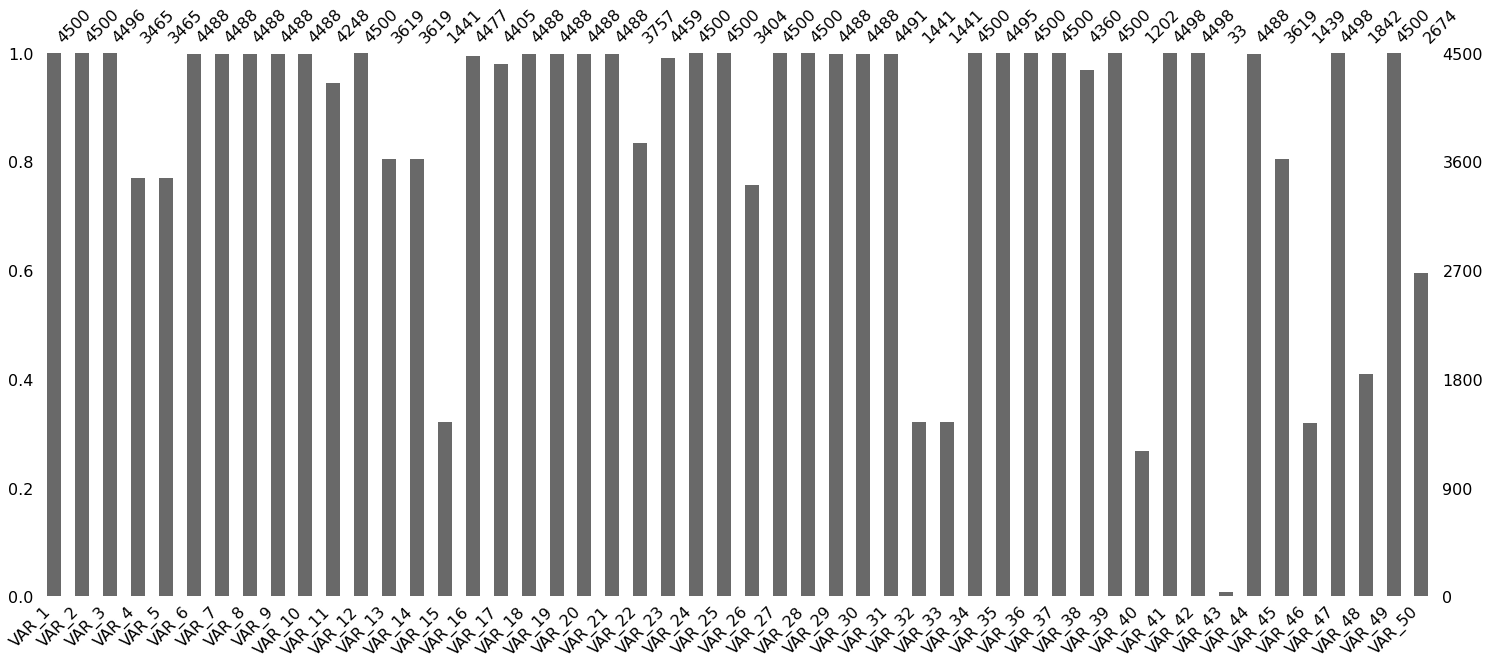

In [15]:
msno.bar(X_train)

<AxesSubplot:>

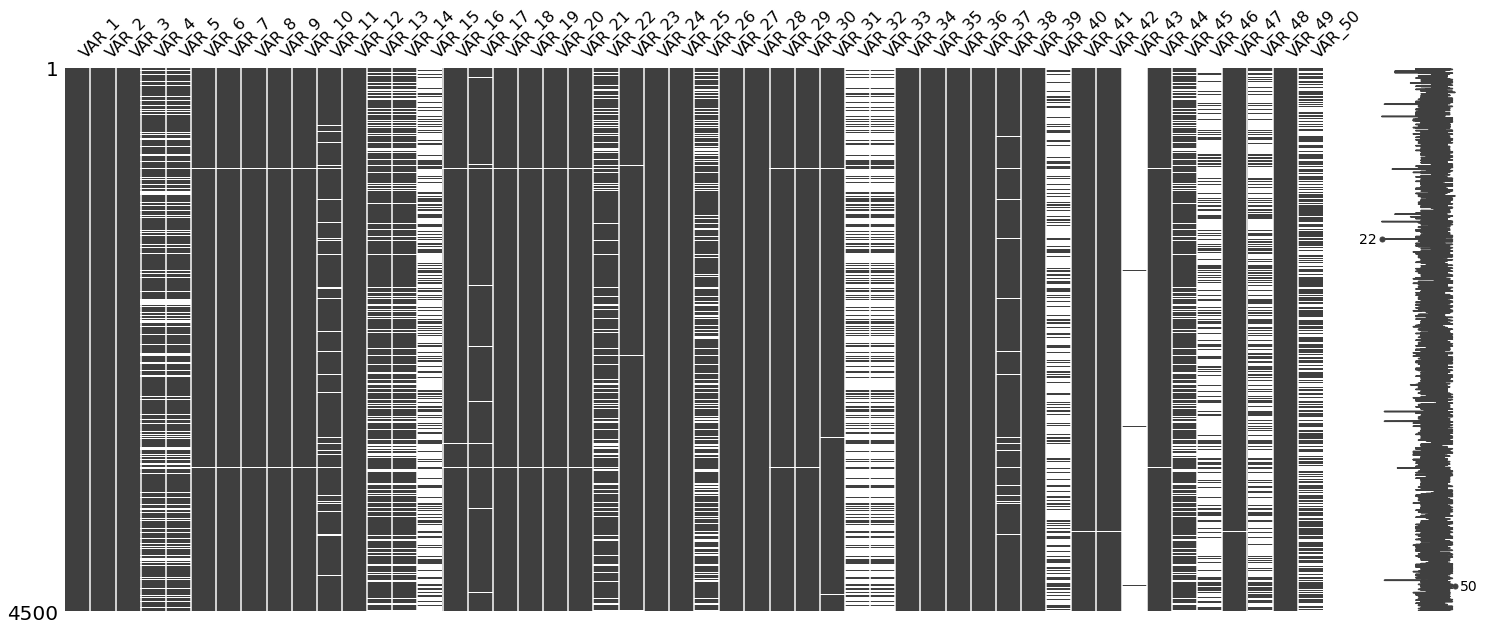

In [16]:
msno.matrix(X_train)

<AxesSubplot:>

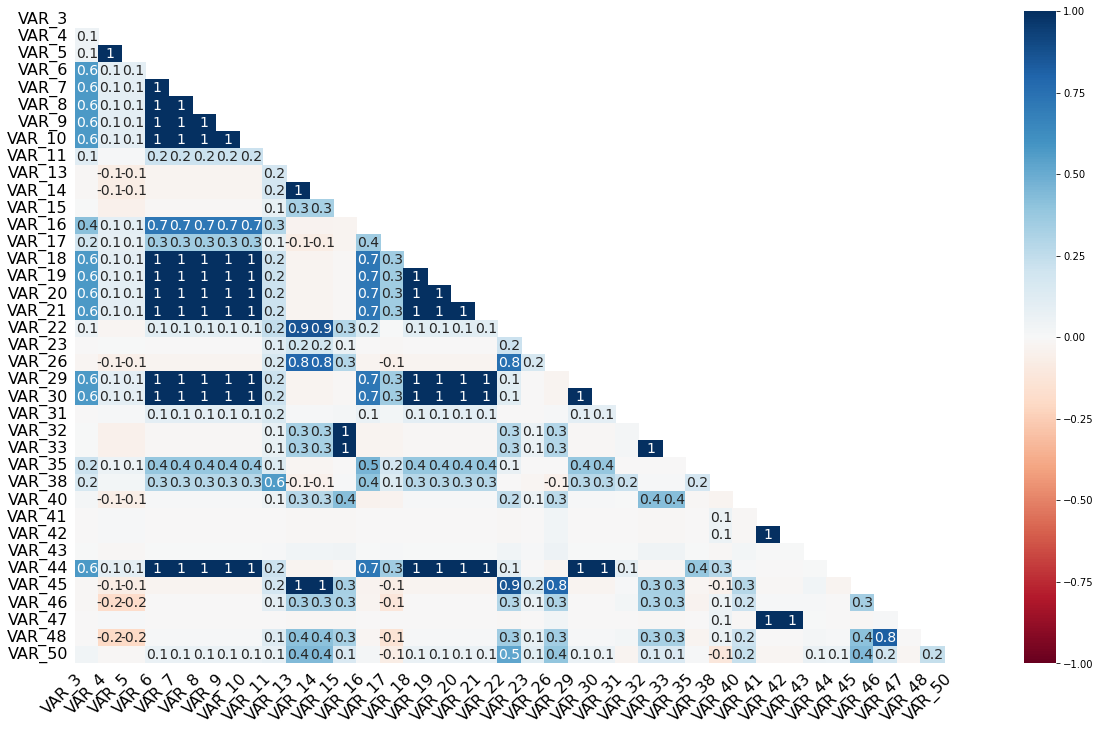

In [17]:
msno.heatmap(X_train)

In [18]:
train_null_percentages = X_train.isnull().mean() * 100
test_null_percentages = X_test.isnull().mean() * 100

# Print columns with null values greater than 50%
null_threshold = 50
train_null_columns = train_null_percentages[train_null_percentages > null_threshold].index.tolist()
test_null_columns = test_null_percentages[test_null_percentages > null_threshold].index.tolist()

print("Train Dataset - Columns with null values greater than 50%:")
print(train_null_columns)

print("\nTest Dataset - Columns with null values greater than 50%:")
print(test_null_columns)

Train Dataset - Columns with null values greater than 50%:
['VAR_15', 'VAR_32', 'VAR_33', 'VAR_40', 'VAR_43', 'VAR_46', 'VAR_48']

Test Dataset - Columns with null values greater than 50%:
['VAR_15', 'VAR_32', 'VAR_33', 'VAR_40', 'VAR_43', 'VAR_46', 'VAR_48']


In [19]:
def drop_columns_with_high_missing(df, threshold=0.5):

    # Calculate the percentage of missing values
    missing_ratios = df.isnull().mean()

    # Select columns with more than the specified threshold of missing values
    columns_to_drop = missing_ratios[missing_ratios > threshold].index

    # Drop the columns
    df = df.drop(columns_to_drop, axis=1)

    return df

def fill_with_mode(df):
    mode_values = df.mode().iloc[0]     # Calculate mode values
    df_filled = df.fillna(mode_values)  # Fill missing values with mode values
    #print(mode_values)
    return df_filled

In [20]:
X_train_drop = drop_columns_with_high_missing(X_train)
X_test_drop = drop_columns_with_high_missing(X_test)

In [21]:
print(X_train_drop.columns)

Index(['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5', 'VAR_6', 'VAR_7', 'VAR_8',
       'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12', 'VAR_13', 'VAR_14', 'VAR_16',
       'VAR_17', 'VAR_18', 'VAR_19', 'VAR_20', 'VAR_21', 'VAR_22', 'VAR_23',
       'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27', 'VAR_28', 'VAR_29', 'VAR_30',
       'VAR_31', 'VAR_34', 'VAR_35', 'VAR_36', 'VAR_37', 'VAR_38', 'VAR_39',
       'VAR_41', 'VAR_42', 'VAR_44', 'VAR_45', 'VAR_47', 'VAR_49', 'VAR_50'],
      dtype='object')


In [22]:
print(X_test_drop.columns)

Index(['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5', 'VAR_6', 'VAR_7', 'VAR_8',
       'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12', 'VAR_13', 'VAR_14', 'VAR_16',
       'VAR_17', 'VAR_18', 'VAR_19', 'VAR_20', 'VAR_21', 'VAR_22', 'VAR_23',
       'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27', 'VAR_28', 'VAR_29', 'VAR_30',
       'VAR_31', 'VAR_34', 'VAR_35', 'VAR_36', 'VAR_37', 'VAR_38', 'VAR_39',
       'VAR_41', 'VAR_42', 'VAR_44', 'VAR_45', 'VAR_47', 'VAR_49', 'VAR_50'],
      dtype='object')


In [23]:
X_test_drop

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_37,VAR_38,VAR_39,VAR_41,VAR_42,VAR_44,VAR_45,VAR_47,VAR_49,VAR_50
1881,3907,I,34.0,3000.0,3000.0,1.0,4700.0,2410.0,948.0,0.0,...,S,4.0,8,3447.0,4339.0,2350.0,1700.0,2884.0,1800,NaN
5159,3210,Q,34.0,1500.0,1500.0,0.0,6500.0,2933.0,1325.0,0.0,...,S,903.0,3,115.0,494.0,3250.0,5000.0,598.0,2550,2550.0
3882,3711,Q,34.0,2000.0,500.0,1.0,13700.0,10417.0,1145.0,0.0,...,S,209.0,17,6825.0,6775.0,4567.0,11200.0,4193.0,4500,4500.0
1537,2406,I,34.0,7700.0,500.0,2.0,12000.0,2920.0,800.0,0.0,...,S,7.0,7,0.0,0.0,2400.0,0.0,0.0,2000,NaN
5522,2801,Q,34.0,NaN,NaN,0.0,3000.0,0.0,2003.0,0.0,...,S,6.0,0,896.0,457.0,3000.0,3000.0,262.0,2050,2050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,4707,W,59.0,2650.0,2650.0,0.0,2650.0,0.0,410.0,0.0,...,Y,702.0,0,0.0,0.0,2650.0,NaN,0.0,1769,NaN
1914,4804,Q,34.0,7200.0,7200.0,0.0,12000.0,3044.0,891.0,0.0,...,O,423.0,5,58752.0,66882.0,6000.0,4800.0,44513.0,4000,4000.0
5025,5500,I,34.0,3200.0,1600.0,0.0,9450.0,4940.0,715.0,0.0,...,S,107.0,9,16.0,55.0,2363.0,0.0,28.0,3450,NaN
4794,2402,W,34.0,1500.0,1500.0,0.0,1500.0,1479.0,380.0,0.0,...,S,205.0,0,0.0,0.0,1500.0,NaN,0.0,1300,NaN


In [24]:
X_train_filled = fill_with_mode(X_train_drop)
X_test_filled = fill_with_mode(X_test_drop)

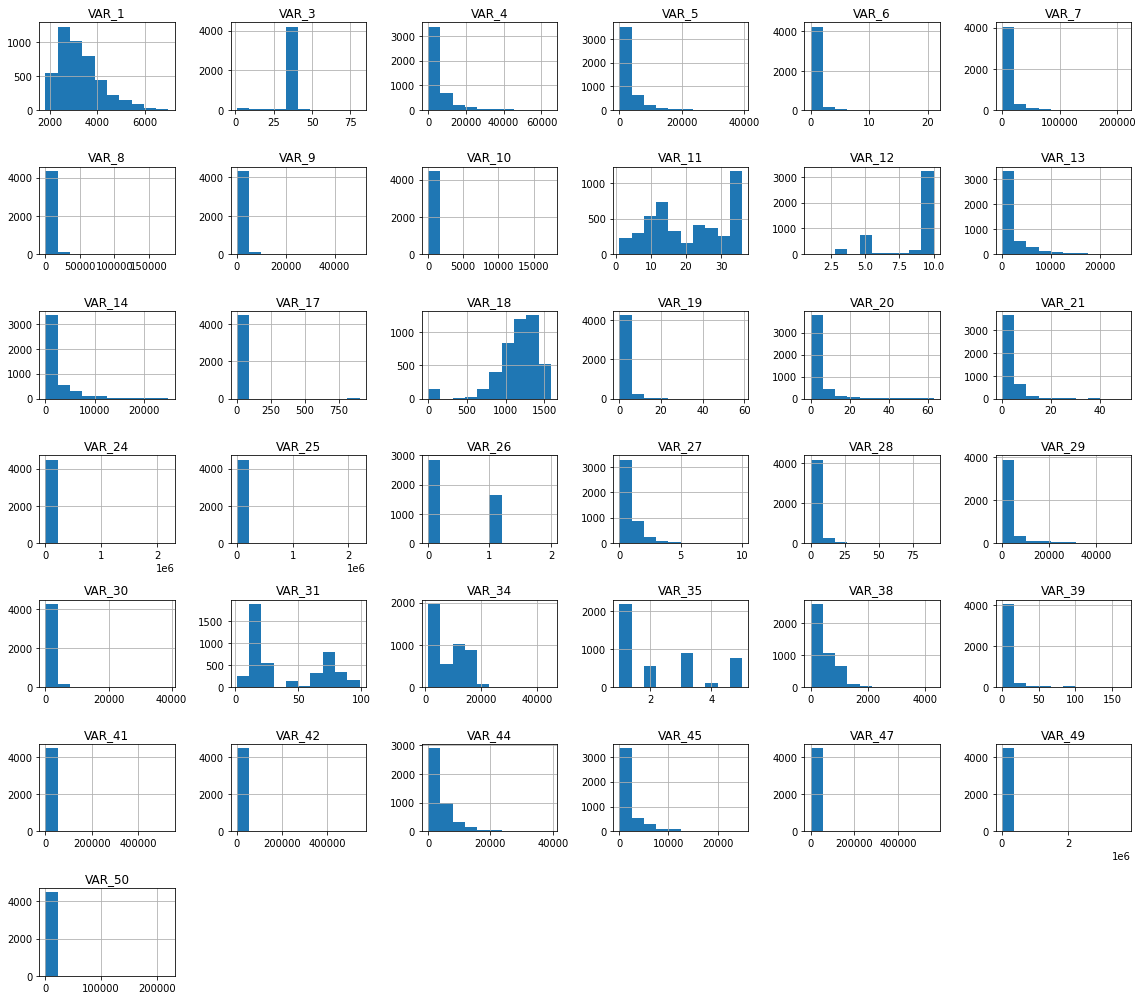

In [25]:
X_train_filled.hist(figsize=(16, 14))  
plt.tight_layout() 

### Encoding

In [26]:
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_filled, y_train)
X_test_encoded = target_encoder.transform(X_test_filled, y_test)

In [27]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 4375 to 309
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VAR_1   4500 non-null   int64  
 1   VAR_2   4500 non-null   float64
 2   VAR_3   4500 non-null   float64
 3   VAR_4   4500 non-null   float64
 4   VAR_5   4500 non-null   float64
 5   VAR_6   4500 non-null   float64
 6   VAR_7   4500 non-null   float64
 7   VAR_8   4500 non-null   float64
 8   VAR_9   4500 non-null   float64
 9   VAR_10  4500 non-null   float64
 10  VAR_11  4500 non-null   float64
 11  VAR_12  4500 non-null   int64  
 12  VAR_13  4500 non-null   float64
 13  VAR_14  4500 non-null   float64
 14  VAR_16  4500 non-null   float64
 15  VAR_17  4500 non-null   float64
 16  VAR_18  4500 non-null   float64
 17  VAR_19  4500 non-null   float64
 18  VAR_20  4500 non-null   float64
 19  VAR_21  4500 non-null   float64
 20  VAR_22  4500 non-null   float64
 21  VAR_23  4500 non-null   float64
 22

In [28]:
X_test_encoded

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_37,VAR_38,VAR_39,VAR_41,VAR_42,VAR_44,VAR_45,VAR_47,VAR_49,VAR_50
1881,3907,0.032438,34.0,3000.0,3000.0,1.0,4700.0,2410.0,948.0,0.0,...,0.040316,4.0,8,3447.0,4339.0,2350.0,1700.0,2884.0,1800,2500.0
5159,3210,0.046044,34.0,1500.0,1500.0,0.0,6500.0,2933.0,1325.0,0.0,...,0.040316,903.0,3,115.0,494.0,3250.0,5000.0,598.0,2550,2550.0
3882,3711,0.046044,34.0,2000.0,500.0,1.0,13700.0,10417.0,1145.0,0.0,...,0.040316,209.0,17,6825.0,6775.0,4567.0,11200.0,4193.0,4500,4500.0
1537,2406,0.032438,34.0,7700.0,500.0,2.0,12000.0,2920.0,800.0,0.0,...,0.040316,7.0,7,0.0,0.0,2400.0,0.0,0.0,2000,2500.0
5522,2801,0.046044,34.0,1000.0,1000.0,0.0,3000.0,0.0,2003.0,0.0,...,0.040316,6.0,0,896.0,457.0,3000.0,3000.0,262.0,2050,2050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,4707,0.061412,59.0,2650.0,2650.0,0.0,2650.0,0.0,410.0,0.0,...,0.049092,702.0,0,0.0,0.0,2650.0,0.0,0.0,1769,2500.0
1914,4804,0.046044,34.0,7200.0,7200.0,0.0,12000.0,3044.0,891.0,0.0,...,0.053186,423.0,5,58752.0,66882.0,6000.0,4800.0,44513.0,4000,4000.0
5025,5500,0.032438,34.0,3200.0,1600.0,0.0,9450.0,4940.0,715.0,0.0,...,0.040316,107.0,9,16.0,55.0,2363.0,0.0,28.0,3450,2500.0
4794,2402,0.061412,34.0,1500.0,1500.0,0.0,1500.0,1479.0,380.0,0.0,...,0.040316,205.0,0,0.0,0.0,1500.0,0.0,0.0,1300,2500.0


### Oversampling

In [29]:
print('No Frauds', round(df['VAR_TARGET'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['VAR_TARGET'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 95.63 % of the dataset
Frauds 4.37 % of the dataset


In [30]:
# pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)

# Check the class distribution of the oversampled data
print(y_train_oversampled.value_counts())

1    4303
0    4303
Name: VAR_TARGET, dtype: int64


## Modelling

In [32]:
def objective(trial):
    # Determining the ranges of Hyper Parameters
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'use_label_encoder': False
    }

    # XGBoost model
    model = xgb.XGBClassifier(**params)
    
    # Cross validation 
    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')  # 5-fold cross validation, doğruluk (accuracy) metriği kullanıldı

    return cv_scores.mean()

In [33]:
# Define the Optuna optimizer
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters and the best model obtained
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test dataset and evaluate the performance
y_pred = best_model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[I 2023-07-16 12:38:08,646] A new study created in memory with name: no-name-63d7e5f3-4e64-4a74-92d3-d4893d0fb771


[12:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:38:21,211] Trial 0 finished with value: 0.9557777777777778 and parameters: {'learning_rate': 0.002124578053706664, 'max_depth': 10, 'n_estimators': 260}. Best is trial 0 with value: 0.9557777777777778.


[12:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:38:38,012] Trial 1 finished with value: 0.9557777777777778 and parameters: {'learning_rate': 0.0018795396900077145, 'max_depth': 7, 'n_estimators': 455}. Best is trial 0 with value: 0.9557777777777778.


[12:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:38:40,574] Trial 2 finished with value: 0.9562222222222223 and parameters: {'learning_rate': 0.009590277490069037, 'max_depth': 3, 'n_estimators': 155}. Best is trial 2 with value: 0.9562222222222223.


[12:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:38:47,751] Trial 3 finished with value: 0.9571111111111111 and parameters: {'learning_rate': 0.09937353611309863, 'max_depth': 4, 'n_estimators': 340}. Best is trial 3 with value: 0.9571111111111111.


[12:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:38:57,831] Trial 4 finished with value: 0.9562222222222221 and parameters: {'learning_rate': 0.020282269901846322, 'max_depth': 6, 'n_estimators': 304}. Best is trial 3 with value: 0.9571111111111111.


[12:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:39:05,972] Trial 5 finished with value: 0.9557777777777778 and parameters: {'learning_rate': 0.054046168025054304, 'max_depth': 3, 'n_estimators': 437}. Best is trial 3 with value: 0.9571111111111111.


[12:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:39:16,687] Trial 6 finished with value: 0.9562222222222223 and parameters: {'learning_rate': 0.032363997928398454, 'max_depth': 5, 'n_estimators': 385}. Best is trial 3 with value: 0.9571111111111111.


[12:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:39:31,337] Trial 7 finished with value: 0.9560000000000001 and parameters: {'learning_rate': 0.006568566236039299, 'max_depth': 5, 'n_estimators': 468}. Best is trial 3 with value: 0.9571111111111111.


[12:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:39:46,384] Trial 8 finished with value: 0.9568888888888889 and parameters: {'learning_rate': 0.003638389293593866, 'max_depth': 8, 'n_estimators': 346}. Best is trial 3 with value: 0.9571111111111111.


[12:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2023-07-16 12:39:54,784] Trial 9 finished with value: 0.9544444444444444 and parameters: {'learning_rate': 0.0013839671006625445, 'max_depth': 5, 'n_estimators': 278}. Best is trial 3 with value: 0.9571111111111111.
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9547069271758437


### Model Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1077
           1       0.40      0.08      0.14        49

    accuracy                           0.95      1126
   macro avg       0.68      0.54      0.56      1126
weighted avg       0.94      0.95      0.94      1126

Confusion Matrix:
 [[1071    6]
 [  45    4]]


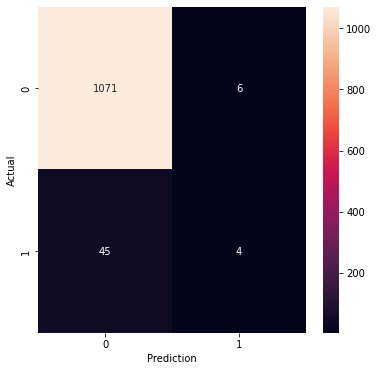

In [34]:
# Classification report is created
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion matrix is created
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fig, ax =  plt.subplots(figsize = (6,6))
sns.heatmap(cm, annot=True, fmt= "d")
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.show()

In [35]:
# Calculate recall scores for class 0 and class 1
recall_0 = recall_score(y_test, y_pred, pos_label=0)
recall_1 = recall_score(y_test, y_pred, pos_label=1)

# Criteria are checked
if recall_0 / recall_1 <= 0.025 and (recall_0 + recall_1) / 2 >= 0.75:
    print("The model meets the stated criteria.")
else:
    print("Model does not meet specified criteria.")

Model does not meet specified criteria.
